In [69]:

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [70]:
DATA_PATH = "data/data.csv"

df = pd.read_csv(DATA_PATH)
df.head()


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3.0,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,313000.0
1,2014-05-02 00:00:00,5.0,2.50,3650,9050,2.0,0,4,5.0,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA,2384000.0
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4.0,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,342000.0
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4.0,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA,420000.0
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4.0,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA,550000.0


In [71]:
# Выводим структурные сведенья о DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4520 non-null   float64
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4390 non-null   float64
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4589 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  price          4600 non-null   float64
dtypes: float

Структура следующая:
date – дата продажи
bedrooms – количество спален
bathrooms – количество ванных комнат
sqft_living – жилая площадь
sqft_lot – общая площадь участка
floors – количество этажей
waterfront – наличие выхода к воде
view – оценка вида
condition – оценка состояния дома
sqft_above – площадь над уровнем земли
sqft_basement – площадь под уровнем земли
yr_built – год постройки дома
yr_renovated – год последнего ремонта
street – название улицы
city – город
statezip – комбинация штата и ZIP-кода
country – страна

In [72]:
# Выводит статистику по столбцам
df.describe(include='all')


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
count,4600,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4520.000000,4600.000000,4600.000000,4390.000000,4600.000000,4600,4589,4600,4600,4.600000e+03
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1,NaN
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1571,148,4600,NaN
mean,NaN,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.450664,1827.265435,312.081522,1970.828929,808.608261,NaN,NaN,NaN,NaN,5.519630e+05
std,NaN,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.678601,862.168977,464.137228,29.736162,979.414536,NaN,NaN,NaN,NaN,5.638347e+05
min,NaN,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN,3.228750e+05
50%,NaN,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN,4.609435e+05
75%,NaN,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN,6.549625e+05


Числовые признаки:
count - количество не пустых значений,
mean - среднее арифметическое,
std - стандартное отклонение,
min, 25%, 50%, 75%, max - значения.

Категориальные/строковые признаки:
unique - количество уникальных элементов,
top - самое частое значение,
freq - частота самого частого значения.

Заметки по данным:
date – строковый признак, требует преобразования в datetime (преобразуем в строку, можно будет использовать вместе с yr_built, месяц возможно полезен, но не точно)
bedrooms – числовой признак, распределён нормально (оставляем как есть)
bathrooms – числовой признак, распределён нормально (оставляем как есть)
sqft_living – числовой признак, скошено вправо (применяем log)
sqft_lot – числовой признак, сильно скошено вправо (применяем log)
floors – дискретный числовой признак, нормальная форма (оставляем как есть)
waterfront – бинарный признак 0/1 (оставляем как есть)
view – дискретный рейтинговый признак 0–4 (оставляем как есть)
condition – дискретный рейтинговый признак 1–5 (оставляем как есть)
sqft_above – числовой признак, скошено вправо (применяем log)
sqft_basement – числовой признак, скошено вправо (применяем log)
yr_built – числовой признак, монотонный диапазон (преобразуем в возраст)
yr_renovated – числовой признак, почти всегда 0 (преобразуем в бинарный ремонт)
street – категориальный признак высокой кардинальности, значения почти уникальны (не используем)
city – категориальный признак высокой кардинальности (не используем)
statezip – категориальный признак высокой кардинальности (не используем)
country – константа, одно значение (не используем)

In [73]:
# Показывает количество пропусков в каждом столбце
df.isna().sum()

date               0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition         80
sqft_above         0
sqft_basement      0
yr_built         210
yr_renovated       0
street             0
city              11
statezip           0
country            0
price              0
dtype: int64

condition - 80 пропусков (можно заполнить медианой)
yr_built - 210 пропусков (можно заполнить медианой)
city - 11 пропусков (уже не используем)


In [74]:
# ПРЕДОБРАБОТКА

# Преобразовываем дату
df['date'] = pd.to_datetime(df['date'])

df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month

df = df.drop(columns=['date'])

# Обрабатываем пропуски
df['condition'] = df['condition'].fillna(df['condition'].median())
df['yr_built'] = df['yr_built'].fillna(df['yr_built'].median())
df['city'] = df['city'].fillna('unknown')

# Более удобные признаки
df['house_age'] = df['sale_year'] - df['yr_built']
df = df.drop(columns=['sale_year'])
df['renovated'] = (df['yr_renovated'] > 0).astype(int)
df = df.drop(columns=['yr_built', 'yr_renovated'])

# Удаляем не используемые признаки
df = df.drop(columns=['street', 'statezip','city','country'])

# Логарифмируем (log1p = log(x+1), безопасная операция с нулями)
for col in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']:
    df[col] = np.log1p(df[col])


In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4600 non-null   float64
 1   bathrooms      4600 non-null   float64
 2   sqft_living    4600 non-null   float64
 3   sqft_lot       4600 non-null   float64
 4   floors         4600 non-null   float64
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   float64
 8   sqft_above     4600 non-null   float64
 9   sqft_basement  4600 non-null   float64
 10  price          4600 non-null   float64
 11  sale_month     4600 non-null   int32  
 12  house_age      4600 non-null   float64
 13  renovated      4600 non-null   int64  
dtypes: float64(10), int32(1), int64(3)
memory usage: 485.3 KB


In [76]:
df.describe()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,price,sale_month,house_age,renovated
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000
mean,3.400870,2.160815,7.576934,9.002273,1.512065,0.007174,0.240652,3.442826,7.413444,2.616127,5.519630e+05,5.757609,42.935000,0.405435
std,0.908848,0.783781,0.429669,0.910537,0.538288,0.084404,0.778405,0.675249,0.435781,3.207574,5.638347e+05,0.683851,29.069372,0.491029
min,0.000000,0.000000,5.916202,6.459904,1.000000,0.000000,0.000000,1.000000,5.916202,0.000000,0.000000e+00,5.000000,0.000000,0.000000
25%,3.000000,1.750000,7.286876,8.517543,1.000000,0.000000,0.000000,3.000000,7.082549,0.000000,3.228750e+05,5.000000,18.000000,0.000000
50%,3.000000,2.250000,7.591357,8.946896,1.500000,0.000000,0.000000,3.000000,7.372118,0.000000,4.609435e+05,6.000000,38.000000,0.000000
75%,4.000000,2.500000,7.871311,9.305855,2.000000,0.000000,0.000000,4.000000,7.741099,6.415097,6.549625e+05,6.000000,62.000000,1.000000
max,9.000000,8.000000,9.513477,13.887104,3.500000,1.000000,4.000000,5.000000,9.149634,8.480737,2.659000e+07,7.000000,114.000000,1.000000


In [77]:
y = df['price']
X = df.drop(columns=['price'])

In [78]:
# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [79]:
# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [80]:
print("R2:", r2_score(y_test, pred))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)



R2: 0.03315188955501036
RMSE: 992993.7093744905


Пока всё грустно и печально))

In [81]:
# работаем с уже предобработанным df (до разбиения)
corr = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
corr


price            1.000000
sqft_living      0.378632
sqft_above       0.335074
bathrooms        0.327110
view             0.228504
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_basement    0.128617
sqft_lot         0.098131
sale_month       0.041081
condition        0.031503
house_age       -0.024408
renovated       -0.028595
Name: price, dtype: float64

In [82]:
df['sqft_living_sq'] = df['sqft_living'] ** 2
df['bath_bed_ratio'] = df['bathrooms'] / df['bedrooms']
df = df.dropna(subset=['bath_bed_ratio'])
df_orign = df.copy()

In [83]:
y = df['price']
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R2: 0.060976078773375075
RMSE: 903147.4834665706


In [84]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.3 * IQR
upper_bound = Q3 + 1.3 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

y = df['price']
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=5)
)
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R2: 0.45982939872291395
RMSE: 157697.44674666613


In [85]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Для каждой модели применяем кросс-валидацию
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    print(f"{name} | R2: {r2:.4f} | RMSE: {rmse:.4f}")

LinearRegression | R2: 0.4598 | RMSE: 157697.4467
Ridge | R2: 0.4518 | RMSE: 158867.6994
Lasso | R2: 0.4544 | RMSE: 158488.7701
ElasticNet | R2: 0.4402 | RMSE: 160534.3655


C:\Users\arkad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.780e+13, tolerance: 1.552e+10
  model = cd_fast.enet_coordinate_descent(


Продолжаем

In [86]:


best_r2 = -float('inf')
best_rmse = float('inf')
best_factor = 1.1
best_bins = 5

for factor in np.arange(1.0, 2.1, 0.1):
    for bins in range(3, 11):
        df = df_orign.copy()

        Q1 = df['price'].quantile(0.25)
        Q3 = df['price'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

        y = df['price']
        X = df.drop(columns=['price'])

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=bins)
        )

        model = LinearRegression()
        model.fit(X_train, y_train)

        pred = model.predict(X_test)

        r2 = r2_score(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        rmse = np.sqrt(mse)

        print(f"Factor: {factor:.1f} | Bins: {bins} | R2: {r2:.4f} | RMSE: {rmse:.4f}")

        if r2 > best_r2:
            best_r2 = r2
            best_rmse = rmse
            best_factor = factor
            best_bins = bins

# Лучший параметр и метрики
print(f"\nЛучший множитель: {best_factor:.1f}")
print(f"Лучший bins: {best_bins}")
print(f"Лучший R2: {best_r2:.4f}")
print(f"Лучший RMSE: {best_rmse:.4f}")



Factor: 1.0 | Bins: 3 | R2: 0.3501 | RMSE: 162606.3164
Factor: 1.0 | Bins: 4 | R2: 0.3340 | RMSE: 163784.1950
Factor: 1.0 | Bins: 5 | R2: 0.3871 | RMSE: 157918.7439
Factor: 1.0 | Bins: 6 | R2: 0.3520 | RMSE: 163955.1712
Factor: 1.0 | Bins: 7 | R2: 0.4172 | RMSE: 153211.6167
Factor: 1.0 | Bins: 8 | R2: 0.3760 | RMSE: 159982.5805
Factor: 1.0 | Bins: 9 | R2: 0.4050 | RMSE: 155022.3398
Factor: 1.0 | Bins: 10 | R2: 0.3402 | RMSE: 161990.7312
Factor: 1.1 | Bins: 3 | R2: 0.3254 | RMSE: 168655.7065
Factor: 1.1 | Bins: 4 | R2: 0.3831 | RMSE: 157755.6890
Factor: 1.1 | Bins: 5 | R2: 0.3489 | RMSE: 166530.0846
Factor: 1.1 | Bins: 6 | R2: 0.3857 | RMSE: 161177.9171
Factor: 1.1 | Bins: 7 | R2: 0.3785 | RMSE: 159955.5999
Factor: 1.1 | Bins: 8 | R2: 0.3956 | RMSE: 159000.1022
Factor: 1.1 | Bins: 9 | R2: 0.3998 | RMSE: 159112.5423
Factor: 1.1 | Bins: 10 | R2: 0.3383 | RMSE: 166316.7273
Factor: 1.2 | Bins: 3 | R2: 0.3138 | RMSE: 177016.7753
Factor: 1.2 | Bins: 4 | R2: 0.3375 | RMSE: 169877.1311
Factor: 

In [87]:
df = df_orign.copy()
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.7 * IQR
upper_bound = Q3 + 1.7 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
y = df['price']
X = df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=9)
)
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2: 0.5051293083476149
RMSE: 159938.76223366085


Попробуем что-то новое

In [88]:
DATA_PATH = "data/data.csv"

df = pd.read_csv(DATA_PATH)

df = df.drop(columns=['date'])

df['condition'] = df['condition'].fillna(df['condition'].median())
df['yr_built'] = df['yr_built'].fillna(df['yr_built'].median())
df['city'] = df['city'].fillna('unknown')

df = df.drop(columns=['street', 'country'])

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.7 * IQR
upper_bound = Q3 + 1.7 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

y = df['price']
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=9))

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2: 0.7517022984065845
RMSE: 113256.20187164983


In [89]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

DATA_PATH = "data/data.csv"

df = pd.read_csv(DATA_PATH)

df['condition'] = df['condition'].fillna(df['condition'].median())
df['yr_built'] = df['yr_built'].fillna(df['yr_built'].median())
df['city'] = df['city'].fillna('unknown')

df = df.drop(columns=['date'])
df = df.drop(columns=['street', 'country'])

Q1 = df['price'].quantile(0.05)
Q3 = df['price'].quantile(0.95)
IQR = Q3 - Q1
lower_bound = Q1 - 1.7 * IQR
upper_bound = Q3 + 1.7 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

y = df['price']
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=9)
)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2: 0.7044221904704252
RMSE: 180261.95580628244


Поиск оптимального q...
q	R2		RMSE		Корзин
2	0.664841	198298.93		2
3	0.302117	467540.35		3
4	0.617105	246298.82		4
5	0.075654	897369.07		5
6	0.686524	191686.55		6
7	0.607103	203992.14		7
8	0.662790	253690.49		8
9	0.708992	197930.93		9
10	0.660060	207380.54		10
11	0.283996	470903.48		11
12	0.283816	452632.00		12
13	0.632060	245426.24		13
14	0.274465	454234.14		14
15	0.648992	217676.93		15
16	0.389632	464583.24		16
17	0.060506	899587.42		17
18	0.667336	218811.00		18
19	0.266885	451745.77		19
20	0.656169	242493.19		20
21	0.668367	199572.16		21
22	0.657429	222812.75		22
23	0.671600	220420.29		23
24	0.672947	202175.79		24
25	0.645764	206087.28		25
26	0.556780	240719.49		26
27	0.301698	447900.97		27
28	0.616162	224073.15		28
29	0.292135	457273.03		29

ЛУЧШИЙ РЕЗУЛЬТАТ:
q = 9
R2 = 0.708992
RMSE = 197930.93
Количество корзин = 9


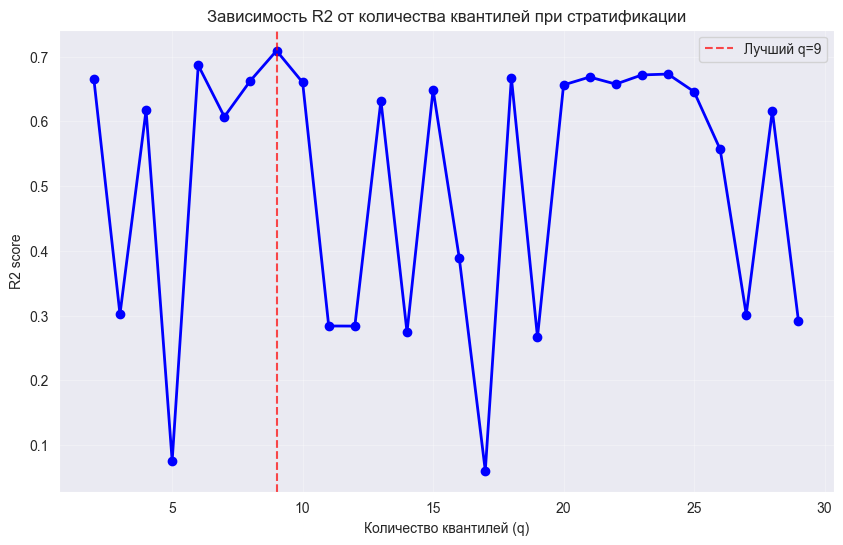

In [93]:
DATA_PATH = "data/data.csv"

df = pd.read_csv(DATA_PATH)

df['condition'] = df['condition'].fillna(df['condition'].median())
df['yr_built'] = df['yr_built'].fillna(df['yr_built'].median())
df['city'] = df['city'].fillna('unknown')

df = df.drop(columns=['date'])
df = df.drop(columns=['street', 'country'])

y = df['price']
X = df.drop(columns=['price'])

# Функция для оценки модели с разными q
def evaluate_with_q(q_value):
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42,
            stratify=pd.qcut(y, q=q_value, duplicates='drop')
        )

        numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ])

        categorical_features = X.select_dtypes(include=['object']).columns
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        r2 = r2_score(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        rmse = np.sqrt(mse)

        return r2, rmse, len(pd.qcut(y, q=q_value, duplicates='drop').unique())

    except Exception as e:
        print(f"Ошибка при q={q_value}: {e}")
        return None, None, None

# Перебираем разные значения q
q_values = range(2, 30)  # Проверяем от 2 до 29 квантилей
results = []

print("Поиск оптимального q...")
print("q\tR2\t\tRMSE\t\tКорзин")

best_r2 = -float('inf')
best_q = None
best_result = None

for q in q_values:
    r2, rmse, n_bins = evaluate_with_q(q)
    if r2 is not None:
        results.append((q, r2, rmse, n_bins))
        print(f"{q}\t{r2:.6f}\t{rmse:.2f}\t\t{n_bins}")

        if r2 > best_r2:
            best_r2 = r2
            best_q = q
            best_result = (q, r2, rmse, n_bins)

print("\n" + "="*50)
if best_result:
    print(f"ЛУЧШИЙ РЕЗУЛЬТАТ:")
    print(f"q = {best_result[0]}")
    print(f"R2 = {best_result[1]:.6f}")
    print(f"RMSE = {best_result[2]:.2f}")
    print(f"Количество корзин = {best_result[3]}")

    # Визуализация результатов
    import matplotlib.pyplot as plt

    q_values = [r[0] for r in results]
    r2_scores = [r[1] for r in results]

    plt.figure(figsize=(10, 6))
    plt.plot(q_values, r2_scores, 'bo-', linewidth=2, markersize=6)
    plt.xlabel('Количество квантилей (q)')
    plt.ylabel('R2 score')
    plt.title('Зависимость R2 от количества квантилей при стратификации')
    plt.grid(True, alpha=0.3)
    plt.axvline(x=best_q, color='red', linestyle='--', alpha=0.7, label=f'Лучший q={best_q}')
    plt.legend()
    plt.show()

else:
    print("Не удалось найти рабочий параметр q")

In [92]:
DATA_PATH = "data/data.csv"

df = pd.read_csv(DATA_PATH)

df['condition'] = df['condition'].fillna(df['condition'].median())
df['yr_built'] = df['yr_built'].fillna(df['yr_built'].median())
df['city'] = df['city'].fillna('unknown')

df = df.drop(columns=['date'])
df = df.drop(columns=['street', 'country'])

y = df['price']
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    stratify=pd.qcut(y, q=9, duplicates='drop')
)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2: 0.70899155547436
RMSE: 197930.92977825506
